In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import basedosdados as bd
import seaborn as sns

In [2]:
# Carregando os dados previamente filtrados via SQL em um dataframe
df_global = bd.read_sql(
    
    """SELECT year as Ano,
              country as pais,
              population as populacao,
              employees as empregados,
              real_gdp_output as PIB_Producao,
              average_hours_worked as Md_Hr_Trabalhada,
              current_consumption as consumo_Real,
        FROM `basedosdados.nl_ug_pwt.microdados`
        """,
billing_project_id="projeto-selecao-senso-2022", reauth=True)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=c5OXR6dbiIDn0imE1OGN7PygQe5akc&access_type=offline


Downloading: 100%|██████████| 12810/12810 [00:02<00:00, 4590.40rows/s]


In [3]:
#Usado comando para se ter uma breve noção sobre o dataframe, (quantidade de itens, tipo de cada coluna, quantidade de nulos)
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               12810 non-null  Int64  
 1   pais              12810 non-null  object 
 2   populacao         10399 non-null  float64
 3   empregados        9529 non-null   float64
 4   PIB_Producao      10399 non-null  float64
 5   Md_Hr_Trabalhada  3492 non-null   float64
 6   consumo_Real      10399 non-null  float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 713.2+ KB


In [4]:
#Filtrado os países com a maior quantidade nominal consumida e inserido em váriaveis conforme o ano da filtragem.
rank_Consumo = df_global[['Ano', 'pais', 'consumo_Real']]

Ano_2010 = rank_Consumo.query('Ano == 2010').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2011 = rank_Consumo.query('Ano == 2011').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2012 = rank_Consumo.query('Ano == 2012').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2013 = rank_Consumo.query('Ano == 2013').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2014 = rank_Consumo.query('Ano == 2014').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2015 = rank_Consumo.query('Ano == 2015').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2016 = rank_Consumo.query('Ano == 2016').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2017 = rank_Consumo.query('Ano == 2017').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2018 = rank_Consumo.query('Ano == 2018').sort_values(by='consumo_Real', ascending = False).head(1)
Ano_2019 = rank_Consumo.query('Ano == 2019').sort_values(by='consumo_Real', ascending = False).head(1)

#Concatendo os dados coletados anteriomente em uma tabela.
Maior_Consumo = pd.concat([Ano_2010, Ano_2011, Ano_2012, Ano_2013,Ano_2014,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019])
Maior_Consumo.reset_index().drop(columns=['index'], axis = 1)

,Ano,pais,consumo_Real
0,2010,United States,1.389742e+13
1,2011,United States,1.416261e+13
2,2012,United States,1.409519e+13
3,2013,United States,1.429468e+13
4,2014,United States,1.467276e+13
5,2015,United States,1.519205e+13
6,2016,United States,1.560235e+13
7,2017,United States,1.601979e+13
8,2018,United States,1.643456e+13
9,2019,United States,1.682624e+13


É esperado que os países membros do G8 ocupem algumas das principais posições na lista de países com o maior consumo real familiar e do governo, conforme a teoria macroeconômica a variavel consumo possui uma grande influência no valor final do Produto Interno Bruto (PIB) de um país, logo é esperado que países que possuam maiores PIB's tendam a ter um valor maior em consumo familiar e governamental.

In [5]:
#separando os dados e posteriormente concatenando em uma unica tabela
Chile = df_global[(df_global['pais'] == 'Chile')]
Chile = Chile[['Ano', 'pais','PIB_Producao']].query('Ano > 2015')

Argentina = df_global[(df_global['pais'] == 'Argentina')]
Argentina = Argentina[['Ano', 'pais','PIB_Producao']].query('Ano > 2015')

Peru = df_global[(df_global['pais'] == 'Peru')]
Peru = Peru[['Ano', 'pais','PIB_Producao']].query('Ano > 2015')
Peru

Brasil = df_global[(df_global['pais'] == 'Brazil')]
Brasil = Brasil[['Ano', 'pais','PIB_Producao']].query('Ano > 2015')

America_sul = pd.concat([Chile, Argentina, Peru, Brasil])
America_sul

,Ano,pais,PIB_Producao
2306,2016,Chile,4.116372e+11
2307,2017,Chile,4.223090e+11
2308,2018,Chile,4.361372e+11
2309,2019,Chile,4.406833e+11
416,2016,Argentina,9.087713e+11
417,2017,Argentina,1.022513e+12
418,2018,Argentina,1.021129e+12
419,2019,Argentina,9.774206e+11
9376,2016,Peru,3.633084e+11
9377,2017,Peru,3.759677e+11


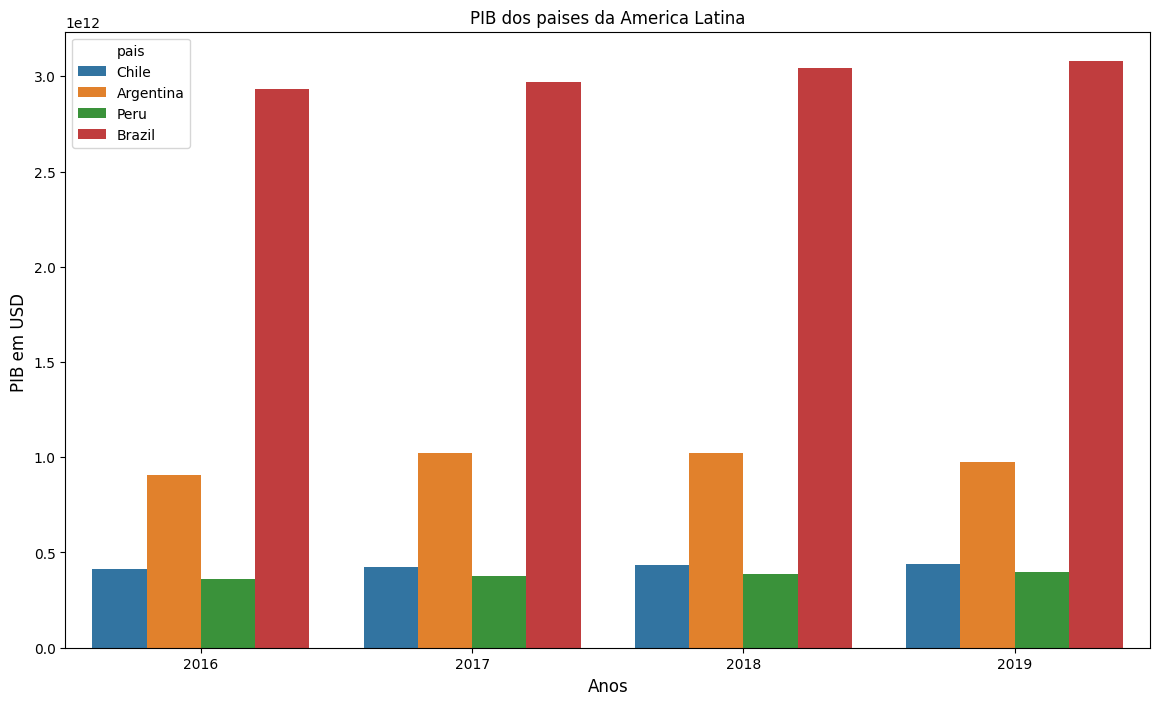

In [6]:
#Efetuando a plotagens dos dados coletados da tabela America_sul, em formato de um gráfico de barras verticais, para
#facilitar a comparação do Produto interno bruto entre alguns dos países da America do Sul.
plt.figure(figsize = (14, 8))
sns.barplot(x ='Ano', y = 'PIB_Producao', hue = 'pais', 
           data = America_sul)
plt.title('PIB dos paises da America Latina')
plt.ylabel('PIB em USD ', size = 12)
plt.xlabel('Anos', size = 12)
plt.show()

É possivel verificar que o Brasil possui um PIB bem superior aos outros países da America do Sul comparados, isso se dá pela grande aréa territorial, e sua grande capacidade de exportação.

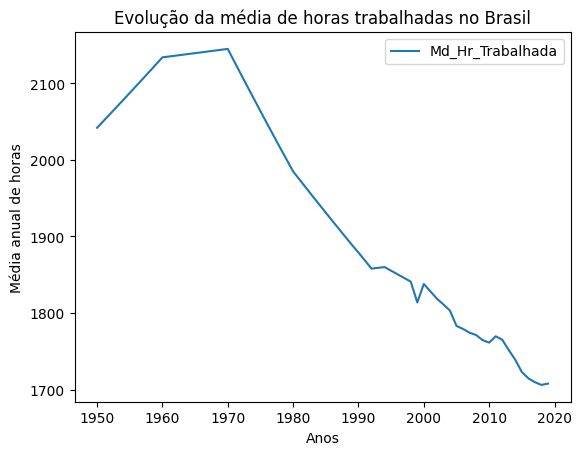

In [7]:
#Plotando da evolução da quantidade média anual de horas trabalhadas no Brasil
df_BR = df_global[(df_global['pais'] == 'Brazil')]
Hr_trabalhada = df_BR[['Ano', 'Md_Hr_Trabalhada']]
Hr_trabalhada['Md_Hr_Trabalhada'] = round(Hr_trabalhada['Md_Hr_Trabalhada'], 2)
Hr_trabalhada.plot(x='Ano', y = 'Md_Hr_Trabalhada', xlabel = 'Anos', ylabel ='Média anual de horas', 
                   title = 'Evolução da média de horas trabalhadas no Brasil')
plt.show()

É possivel ver uma diminuição da quantidade médias de horas anuais trabalhadas devido a maior intensificação das leis trabalhistas após a criação da CLT em 1943, isso acontece devido o aumento de regulamentação trabalhista e proibição das jornadas de trabalho de mais 10 horas de duração, surgimento de jornadas de 40 horas semanais, ocasionando assim, diminuições da média ao longo prazo.

In [8]:
#Criando 2 novas colunas chamadas de Taxa Empregado(%) e PIB_PerCapta
empre_renda = df_global[['Ano','pais','populacao','empregados','PIB_Producao']].query('Ano >= 2010')
empre_renda['Taxa Empregado(%)'] = round(empre_renda['empregados']/empre_renda['populacao'], 2) *100
empre_renda['PIB_PerCapta'] = round(empre_renda['PIB_Producao']/empre_renda['populacao'], 2)
empre_renda = empre_renda[['Ano','pais','Taxa Empregado(%)','PIB_PerCapta']].reset_index()
#Apagando os itens não númericos (NAN)
empre_renda.dropna(subset=["Taxa Empregado(%)"], inplace = True)
empre_renda = empre_renda.drop(columns=['index'], axis = 1)
#Ordenando a tabela por ano e país usando o comando groupby
empre_renda = empre_renda.groupby(['Ano','pais'])['Taxa Empregado(%)','PIB_PerCapta'].sum()

In [9]:
#coletando dados do brasil da tabela anterior
empre_renda_BR = empre_renda.query('pais == "Brazil"').reset_index()
empre_renda_BR

,Ano,pais,Taxa Empregado(%),PIB_PerCapta
0,2010,Brazil,44.0,15012.52
1,2011,Brazil,45.0,16611.41
2,2012,Brazil,45.0,16416.60
3,2013,Brazil,45.0,16445.10
4,2014,Brazil,46.0,16262.96
5,2015,Brazil,45.0,15077.58
6,2016,Brazil,44.0,14219.40
7,2017,Brazil,44.0,14284.61
8,2018,Brazil,44.0,14522.99
9,2019,Brazil,45.0,14593.96
